In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import metrics

In [57]:
result = pd.read_csv('./result/default_sgd_notime.csv',index_col = 0)

In [60]:
# start evaluation
risk_thr1 = np.arange(0,1e-9,1e-10)
risk_thr2 = np.arange(1e-3,0.1,1e-3)
risk_thr3 = np.arange(1-1e-9,1+1e-9,1e-10)
risk_thr = np.concatenate([risk_thr1,risk_thr2,risk_thr3])
FNR1 = 0.001
FNR2 = 0.005
FNR3=0.01
model_score = 0
min1 = min2 = min3 = 1
for thr in risk_thr:
    tmp_result = result.copy()
    tmp_result.loc[tmp_result['score']>=thr,'score'] = 1
    tmp_result.loc[tmp_result['score']<thr,'score']=0
    TR = tmp_result.loc[(tmp_result['score']==1) & (tmp_result['truth']==1)].shape[0]
    FN = tmp_result.loc[(tmp_result['score']==0)&(tmp_result['truth']==1)].shape[0]
    TN = tmp_result.loc[(tmp_result['score']==0) & (tmp_result['truth']==0)].shape[0]
    FP = tmp_result.loc[(tmp_result['score']==1) & (tmp_result['truth']==0)].shape[0]
    TPR = TR/(TR+FN)
    FNR = FP/(TN+FP)
    if abs(FNR-FNR1)<min1:
        min1 = abs(FNR-FNR1)
        FNR11 = FNR
        TPR1 = TPR
    if abs(FNR-FNR2)<min2:
        min2 = abs(FNR-FNR2)
        FNR22 = FNR
        TPR2 = TPR
    if abs(FNR-FNR3)<min3:
        min3 = abs(FNR-FNR3)
        FNR33 = FNR
        TPR3 = TPR
    del tmp_result
print((FNR11,TPR1),(FNR22,TPR2),(FNR33,TPR3))
print(0.4*TPR1+0.3*TPR2+0.3*TPR3)

(0.001257874498895525, 0.13393590797041907) (0.004985478196842019, 0.28841413311421527) (0.010073222613106439, 0.38249794576828267)
0.254847986852917


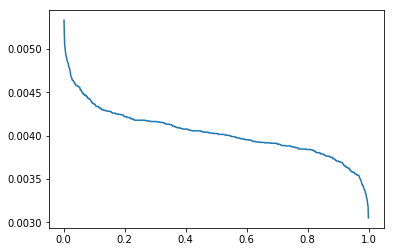

In [44]:
import matplotlib.pyplot as plt
# thr-FNR 折线图
plt.plot(risk_thr[1:],FNRs[1:])
plt.show()